##### Copyright 2019 The TensorFlow Authors.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.14.0'

In [ ]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-arzz8v_j
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-arzz8v_j
  Resolved https://github.com/tensorflow/docs to commit ec765851b8312bdc4dcf685e41020ce568c7bff2
  Preparing metadata (setup.py) ... done


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import time
import cv2

from IPython import display

In [ ]:
a = 100
b = str(a).zfill(5)
print(b)

00100


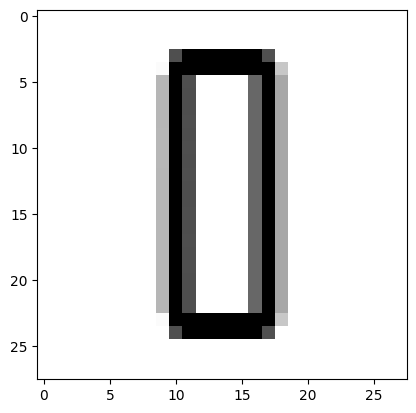

In [ ]:
testimg = cv2.imread("/content/drive/MyDrive/Digits/0/img001-00001.png")
testimg2 = cv2.resize(testimg, dsize = (28, 28))
plt.figure()
plt.imshow(testimg2)
plt.show()

In [ ]:
train_images = []
train_labels = []
for i in range(9,10):
  for j in range(600):
    pathName = "/content/drive/MyDrive/Digits/" + str(i) + "/img" + str(i+1).zfill(3) + "-" + str(j+1).zfill(5) + ".png"
    numImg = cv2.imread(pathName)
    numImg = cv2.resize(numImg, dsize = (28, 28))
    numImg = cv2.cvtColor(numImg, cv2.COLOR_BGR2GRAY)
    numImg = 255 - numImg
    train_images.append(numImg)
    train_labels.append(i)
    print(f"{i}번째: {(j*100)//600}%완료")
train_images = np.array(train_images)
train_labels = np.array(train_labels)

9번째: 0%완료
9번째: 0%완료
9번째: 0%완료
9번째: 0%완료
9번째: 0%완료
9번째: 0%완료
9번째: 1%완료
9번째: 1%완료
9번째: 1%완료
9번째: 1%완료
9번째: 1%완료
9번째: 1%완료
9번째: 2%완료
9번째: 2%완료
9번째: 2%완료
9번째: 2%완료
9번째: 2%완료
9번째: 2%완료
9번째: 3%완료
9번째: 3%완료
9번째: 3%완료
9번째: 3%완료
9번째: 3%완료
9번째: 3%완료
9번째: 4%완료
9번째: 4%완료
9번째: 4%완료
9번째: 4%완료
9번째: 4%완료
9번째: 4%완료
9번째: 5%완료
9번째: 5%완료
9번째: 5%완료
9번째: 5%완료
9번째: 5%완료
9번째: 5%완료
9번째: 6%완료
9번째: 6%완료
9번째: 6%완료
9번째: 6%완료
9번째: 6%완료
9번째: 6%완료
9번째: 7%완료
9번째: 7%완료
9번째: 7%완료
9번째: 7%완료
9번째: 7%완료
9번째: 7%완료
9번째: 8%완료
9번째: 8%완료
9번째: 8%완료
9번째: 8%완료
9번째: 8%완료
9번째: 8%완료
9번째: 9%완료
9번째: 9%완료
9번째: 9%완료
9번째: 9%완료
9번째: 9%완료
9번째: 9%완료
9번째: 10%완료
9번째: 10%완료
9번째: 10%완료
9번째: 10%완료
9번째: 10%완료
9번째: 10%완료
9번째: 11%완료
9번째: 11%완료
9번째: 11%완료
9번째: 11%완료
9번째: 11%완료
9번째: 11%완료
9번째: 12%완료
9번째: 12%완료
9번째: 12%완료
9번째: 12%완료
9번째: 12%완료
9번째: 12%완료
9번째: 13%완료
9번째: 13%완료
9번째: 13%완료
9번째: 13%완료
9번째: 13%완료
9번째: 13%완료
9번째: 14%완료
9번째: 14%완료
9번째: 14%완료
9번째: 14%완료
9번째: 14%완료
9번째: 14%완료
9번째: 15%완료
9번째: 15%완료
9번째: 15%완료
9번째: 15%완료
9번째: 15%완료
9번째: 15%완료
9번째:

In [ ]:
from sklearn.preprocessing import normalize
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images-127.5)/127.5

In [ ]:
BUFFER_SIZE = 600
BATCH_SIZE = 32

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

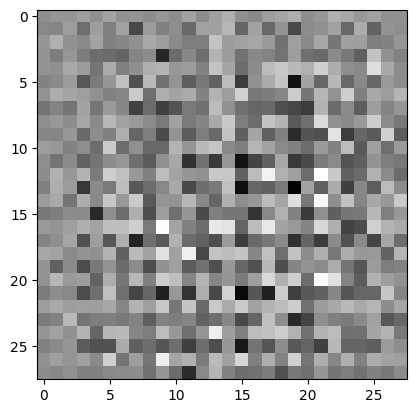

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00603171]], shape=(1, 1), dtype=float32)


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 300
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
g_loss, d_loss = [],[]
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)
      #g_loss.append(gen_loss)
      #d_loss.append(disc_loss)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()
'''def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  # fig = plt.figure(figsize=(4, 4))

  # for i in range(predictions.shape[0]):
  #     plt.subplot(4, 4, i+1)
  #     plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
  #     print(predictions[i,:, :, 0])
  #     print(type(predictions[i,:, :, 0]))
  #     plt.axis('off')
  tensor = predictions[i, :, :, 0] * 127.5 + 127.5
  array = tensor.numpy()
  if epoch > 150:
    cv2.imwrite(f'/content/drive/MyDrive/make_digit_9/image_at_epoch_{epoch}.png', array)
  plt.imshow(array,cmap = 'gray')
  # plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  # plt.show()'''

"def generate_and_save_images(model, epoch, test_input):\n  # Notice `training` is set to False.\n  # This is so all layers run in inference mode (batchnorm).\n  predictions = model(test_input, training=False)\n\n  # fig = plt.figure(figsize=(4, 4))\n\n  # for i in range(predictions.shape[0]):\n  #     plt.subplot(4, 4, i+1)\n  #     plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')\n  #     print(predictions[i,:, :, 0])\n  #     print(type(predictions[i,:, :, 0]))\n  #     plt.axis('off')\n  tensor = predictions[i, :, :, 0] * 127.5 + 127.5\n  array = tensor.numpy()\n  if epoch > 150:\n    cv2.imwrite(f'/content/drive/MyDrive/make_digit_9/image_at_epoch_{epoch}.png', array)\n  plt.imshow(array,cmap = 'gray')\n  # plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))\n  # plt.show()"

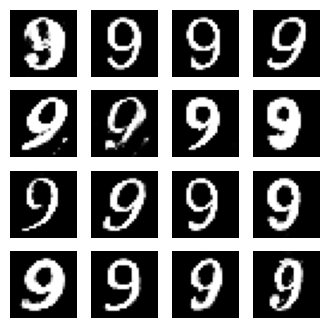

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [ ]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

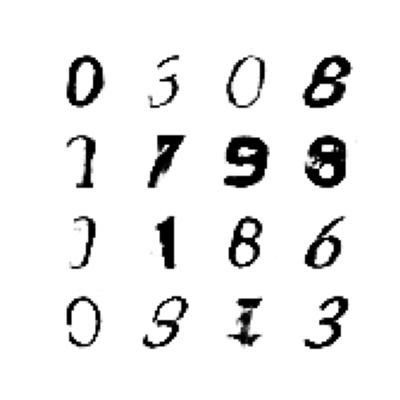

In [ ]:
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-58-56bb6d34be2e>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-58-56bb6d34be2e>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



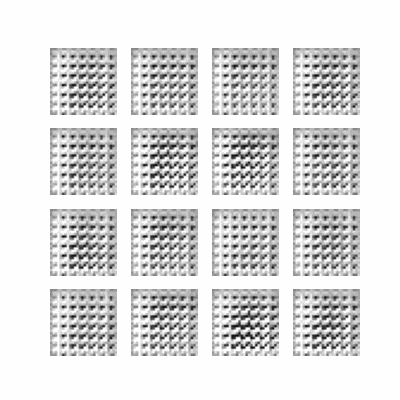

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)